<center><b><h1>Data Analytics Challenge</h1></b></center>
<center><h3>Group Assignment Chapter 2</h3></center>

The goal of this presentation is to demonstrate a proof of concept to show how our group plans to improve the fiscal tax revenue in Rwanda for the 2021-2022 tax season.

Through this notebook, we explore data obtained via the [World bank](https://data.worldbank.org/country/rwanda?view=chart), to demonstrate areas of investment that can help improve the income of the middle class (As well as the overall middle class population) in Rwanda, thereby improving the overall tax contribution for the 2021-2022 tax season. 

## Acknowledgements

This project is executed on behalf of the Rwanda Revenue authority, via the education body (African Leadership University).
![RRALogo](images/RRAlogo.png), ![ALUlogo](images/ALUlogo.png)

## Data Ingestion

For this segment, we downloaded the data gathered by the World bank, via their [online tool](https://data.worldbank.org/country/rwanda?view=chart), about various indices in Rwanda

In [1]:
import pandas as pd

# Read data into a pandas DataFrame
pandas_data_frame = pd.read_excel("datasets/RWA_dataset.xls", header=None)

# Remove initial rows in the dataset and set column header for the df
pandas_data_frame = pandas_data_frame.drop([0, 1, 2], axis=0)
pandas_data_frame.columns = pandas_data_frame.iloc[0]
pandas_data_frame = pandas_data_frame.drop([3], axis=0)

# Drop indices from dataframe
pandas_data_frame.reset_index(drop=True, inplace=True)

In [2]:
# Visual presentation of the first 4 rows in the dataset.
pandas_data_frame.head(4)

3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
0,Rwanda,RWA,Commercial service exports (current US$),TX.VAL.SERV.CD.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,3.158189e+08,3.598366e+08,3.901331e+08,3.976495e+08,5.374535e+08,5.471670e+08,6.607556e+08,6.514597e+08,NaN,NaN
1,Rwanda,RWA,Ores and metals exports (% of merchandise expo...,TX.VAL.MMTL.ZS.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.516682e+01,3.987358e+01,4.772843e+01,4.531222e+01,2.917797e+01,2.240941e+01,2.941363e+01,3.031444e+01,14.803492,NaN
2,Rwanda,RWA,Merchandise imports from low- and middle-incom...,TM.VAL.MRCH.WR.ZS,NaN,NaN,NaN,NaN,37.931034,29.70297,...,3.296103e+01,2.850969e+01,2.576076e+01,2.689395e+01,2.954719e+01,3.055971e+01,3.081096e+01,2.355935e+01,26.987499,NaN
3,Rwanda,RWA,ICT goods imports (% total goods imports),TM.VAL.ICTG.ZS.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.294450e+00,8.312774e+00,6.060430e+00,8.003834e+00,8.229871e+00,8.158198e+00,6.307887e+00,7.345390e+00,5.263855,NaN


## Data Integration & Cleaning

Curretly, the data that has been extracted contains very many indices covering data from Rwanda between 1960 - 2020. For the purpose of this exercise however, we will be looking at data over the past 15 years i.e <b>2005 - 2020 </b> and based on this data, we will also be looking at the following indicators to make our presentation;

- GNI per capita, Atlas method (current US\$)
- Foreign direct investment, net inflows (BoP, current US\$)
- Exports of goods and services (annual % growth)
- School enrollment, secondary (% gross)

In [3]:
# List of accepted indicators for analysis.
row_indicators = ["GNI per capita, Atlas method (current US$)", 
                  "Foreign direct investment, net inflows (BoP, current US$)",
                  "Exports of goods and services (annual % growth)",
                  "School enrollment, secondary (% gross)"
                 ]
# Create dataframe with only accepted indicators.
frames = []
for row_indicator in row_indicators:
    frames.append(pandas_data_frame.loc[pandas_data_frame["Indicator Name"]==row_indicator])
result = pd.concat(frames)

# List of accepted years i.e 2005 - 2020 (15 years).
accepted_columns = ["Indicator Name", 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0]
result = result[accepted_columns]

# Drop indices from dataframe
result.reset_index(drop=True, inplace=True)
pandas_data_frame = result
pandas_data_frame = pandas_data_frame.fillna(0)

In [4]:
pandas_data_frame.head()

3,Indicator Name,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
0,"GNI per capita, Atlas method (current US$)",3.200000e+02,3.600000e+02,4.100000e+02,4.900000e+02,5.500000e+02,6.000000e+02,6.500000e+02,7.100000e+02,7.200000e+02,7.400000e+02,7.500000e+02,7.400000e+02,7.400000e+02,7.800000e+02,8.300000e+02,0.0
1,"Foreign direct investment, net inflows (BoP, c...",7.960000e+06,3.064397e+07,8.228317e+07,1.022900e+08,1.186700e+08,2.161926e+08,1.121275e+08,2.696156e+08,2.337638e+08,3.139972e+08,1.620838e+08,2.797473e+08,2.740260e+08,3.661923e+08,3.844619e+08,0.0
2,Exports of goods and services (annual % growth),1.116185e+01,1.729838e+00,4.395018e+01,-1.141779e+01,-3.116822e+00,8.249206e+00,2.369147e+01,9.011777e+00,1.888326e+01,7.240581e+00,6.254919e+00,1.293168e+01,4.290553e+01,1.059511e+01,1.988520e+01,0.0
3,"School enrollment, secondary (% gross)",1.672549e+01,1.838143e+01,2.044044e+01,2.197306e+01,2.614972e+01,3.161764e+01,3.558722e+01,3.830798e+01,4.071788e+01,4.009128e+01,3.785201e+01,3.727189e+01,3.888265e+01,4.089606e+01,4.431904e+01,0.0


## Presentation

Now we will start by trying to understand the trend in the "GNI per capita, Atlas method (current US$)" index. 

GNI per capita (formerly GNP per capita) is the gross national income, converted to U.S. dollars using the World Bank Atlas method, divided by the midyear population. GNI is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. [1]

The chart below shos the progression of the GNI index over the last 15 years in Rwanda. 

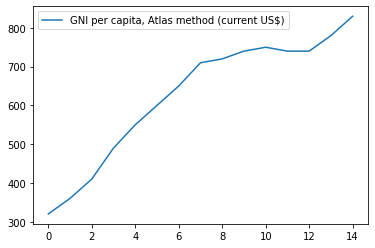

In [5]:
import matplotlib.pyplot as plt


plt.plot(list(pandas_data_frame.iloc[0])[1:-1], label=list(pandas_data_frame.iloc[0])[0])   
    
plt.legend()
plt.show()

From the trend line provided above, we can see that over the past 15 years, Rwanda has managed to consistently improve its GNI per capital. My hypothesis is that the following three indices are major contributing factors to this consistent growth;

- Foreign direct investment, net inflows (BoP, current US\$)
- Exports of goods and services (annual % growth)
- School enrollment, secondary (% gross)

Now let us also explore the trends presented in these different indices.

- **Foreign direct investment, net inflows (BoP, current US\$):** Foreign direct investment refers to direct investment equity flows in the reporting economy. It is the sum of equity capital, reinvestment of earnings, and other capital. [1]


- **Exports of goods and services (annual % growth):** Annual growth rate of exports of goods and services based on constant local currency. Aggregates are based on constant 2010 U.S. dollars. Exports of goods and services represent the value of all goods and other market services provided to the rest of the world. [1]


- **School enrollment, secondary (% gross):** Gross enrollment ratio is the ratio of total enrollment, regardless of age, to the population of the age group that officially corresponds to the level of education shown. Secondary education completes the provision of basic education that began at the primary level, and aims at laying the foundations for lifelong learning and human development, by offering more subject- or skill-oriented instruction using more specialized teachers. [1]

[Text(0, 0.5, 'School enrollment, secondary (% gross)'), Text(0.5, 0, 'years')]

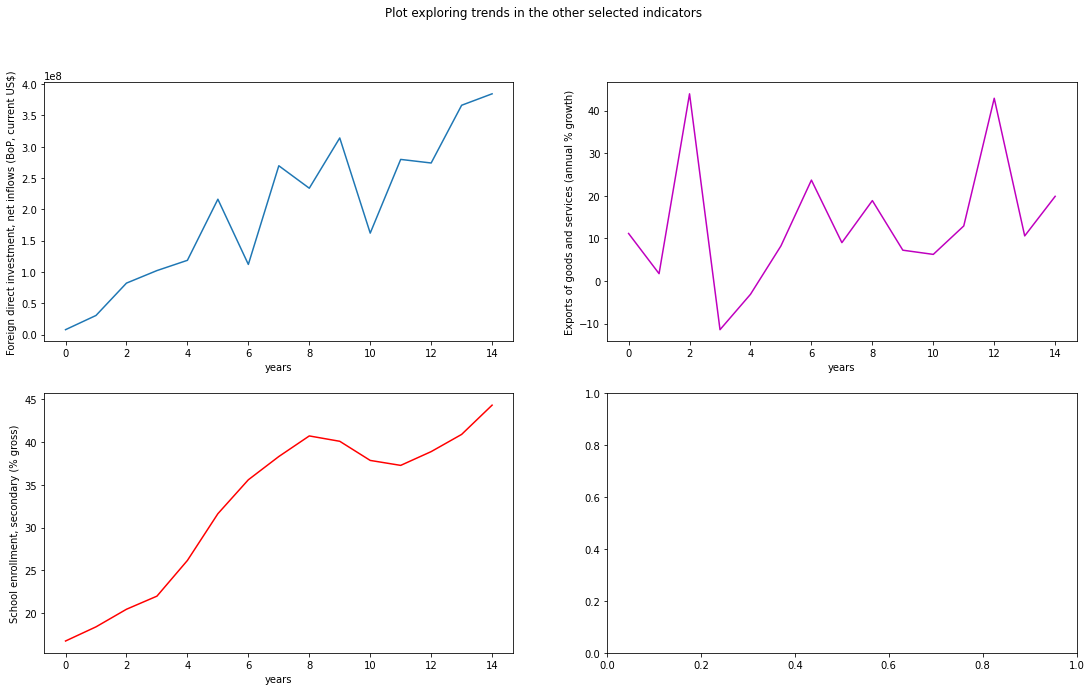

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2)
fig.suptitle('Plot exploring trends in the other selected indicators')
fig.set_size_inches(18.5, 10.5, forward=True)
ax[0, 0].plot(list(pandas_data_frame.iloc[1])[1:-1], label=list(pandas_data_frame.iloc[1])[0])
ax[0, 0].set(ylabel=list(pandas_data_frame.iloc[1])[0], xlabel='years')
ax[0, 1].plot(list(pandas_data_frame.iloc[2])[1:-1], "m", label=list(pandas_data_frame.iloc[2])[0])
ax[0, 1].set(ylabel=list(pandas_data_frame.iloc[2])[0], xlabel='years')
ax[1, 0].plot(list(pandas_data_frame.iloc[3])[1:-1], "r", label=list(pandas_data_frame.iloc[3])[0])
ax[1, 0].set(ylabel=list(pandas_data_frame.iloc[3])[0], xlabel='years')


Of the trends selected and presented above, there is one specific trend that seems to be the exact replica for the earlier observed trend in GNI per capita. And this is the trend for "School enrollement, secondary...". To better highlight this trend similarities, let me plot both trends below side to side.

[Text(0, 0.5, 'School enrollment, secondary (% gross)'), Text(0.5, 0, 'years')]

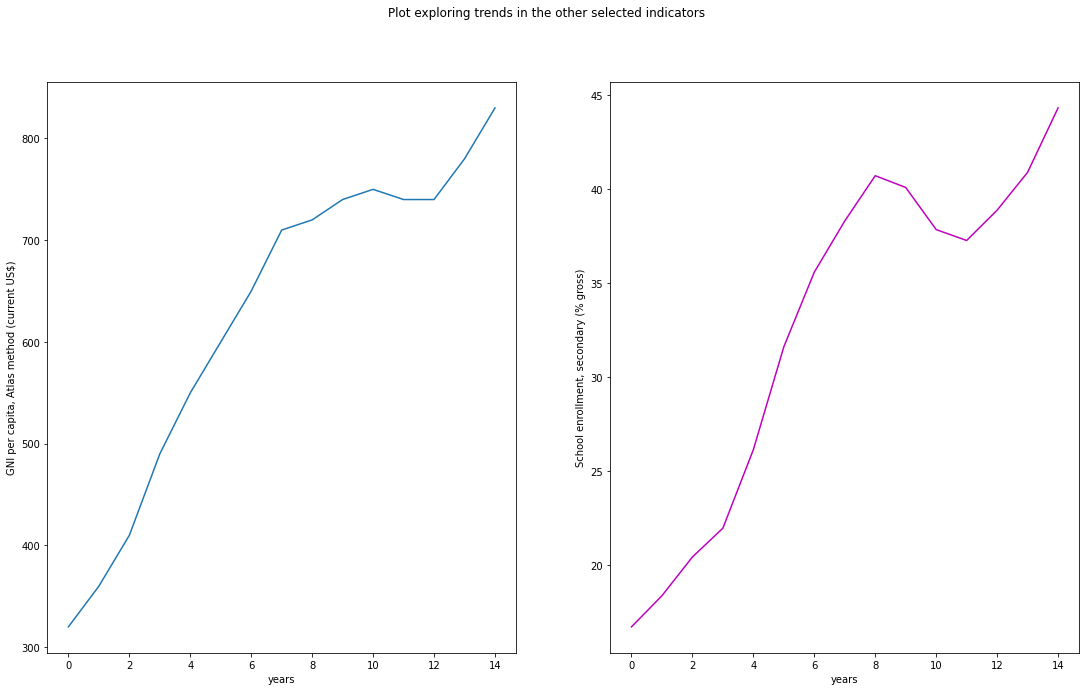

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
fig.suptitle('Plot exploring trends in the other selected indicators')
fig.set_size_inches(18.5, 10.5, forward=True)
ax[0].plot(list(pandas_data_frame.iloc[0])[1:-1], label=list(pandas_data_frame.iloc[0])[0])
ax[0].set(ylabel=list(pandas_data_frame.iloc[0])[0], xlabel='years')
ax[1].plot(list(pandas_data_frame.iloc[3])[1:-1], "m", label=list(pandas_data_frame.iloc[3])[0])
ax[1].set(ylabel=list(pandas_data_frame.iloc[3])[0], xlabel='years')


## Recommendations

**1.) Investment in further education of the general population:** As can be rightly obsreved from the two charts presented above, exploring the similarities between the trend for GNI and the trend for secondary school enrollement, it can be said that an increase in one directly affects an increase in the other where in this case GNI is most likely the dependent index. 

The trends show that an increase in secondary school enrollement helps drive an increase in GNI which will then in turn ultimately drive an increase in Tax revenue since the middle class will be able to afford higher taxes. 

**2.) Investment in Exports of goods and services:** Since Rwanda has been steadlily inproving their foreign direct investment as can be observed from the chart, i would also suggest that some of that investment be divested in exportable goods and services which whill help improve government taxables. 

## Why you should hire us?

Our team is a very dedicated group of analytic programmers! Our mission is to solve complex problems leveraging data and this fits right into the RRA's goal of increasing fiscal tax for the 2021-2022 tax year! We hope for your positive consideration. 

## References

[1]"Rwanda | Data", Data.worldbank.org, 2021. [Online]. Available: https://data.worldbank.org/country/rwanda?view=chart. [Accessed: 06- Mar- 2021].